
# River Plastic Contribution Classification
# Author: Hailom Asegede
# Date: June 30, 2025



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
df = pd.read_csv("global_riverine_plastic_emissions_into_ocean.csv")

# Drop completely empty columns

In [ ]:
df.drop(columns=[col for col in df.columns if df[col].isnull().all()], inplace=True)

# Clean string-formatted numbers

In [ ]:
def clean_numeric(col):
    return col.str.replace("'", "", regex=False).str.replace("%", "", regex=False).astype(float)

columns_to_clean = [
    'Area [km2]',
    'Coast length [km]',
    'Rainfall [mm year -1]',
    'P[E] [%]',
    'MPW (metric tons year -1)',
    'M[E] (metric tons year -1)',
    'Ratio Me/MPW'
]

for col in columns_to_clean:
    df[col] = clean_numeric(df[col])


# Drop rows with missing values

In [ ]:
df = df.dropna()

# Create the label column: 0 = high, 1 = low plastic contribution

In [ ]:
df['plastic_contribution'] = np.where(df['M[E] (metric tons year -1)'] > 6008, 0, 1)

# Select features and target

In [ ]:
features = [
    'Area [km2]',
    'Coast length [km]',
    'Rainfall [mm year -1]',
    'Factor L/A [-]',
    'Factor (L/A) *P [-]',
    'P[E] [%]',
    'MPW (metric tons year -1)',
    'Ratio Me/MPW'
]
X = df[features]
y = df['plastic_contribution']

# Scale features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predict and evaluate

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"ROC AUC Score: {auc:.4f}")

Accuracy: 0.9394
Precision: 0.9375
Recall: 1.0000
ROC AUC Score: 0.8667


# Confusion Matrix

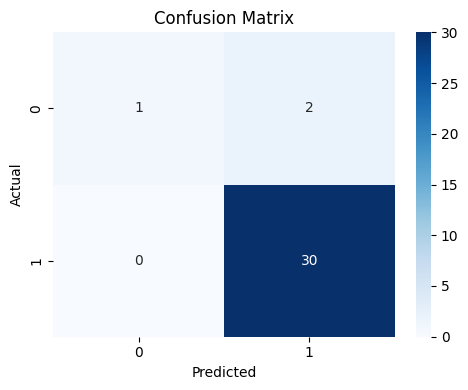

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve

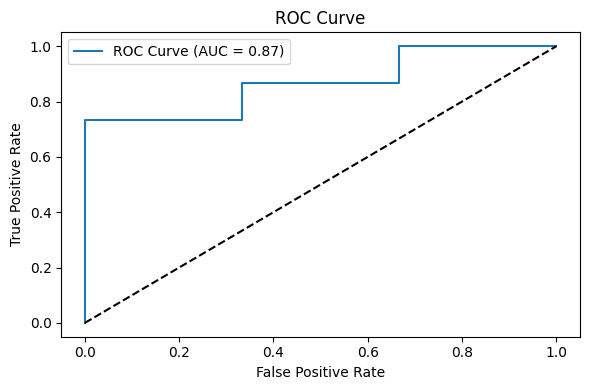

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')